In [3]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
from sklearn.datasets import test_train_split

df = pd.read_csv("New Institutes - New Institutes.csv")
df.head()


,S.No.,Application Number,Application Type,Institute Name,Inst Address,Inst Address 2,CITY,District,Pincode,Minority Institute,Womens institute,State,Region,Inst Type,Program,Course,Level,Specialization,Intake,Approval
0,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,NaN,NaN,Himachal Pradesh,North-West,Unaided-Private,Pharmacy,Pharmacy,Graduate,B. PHARMACY,60,Yes
1,NaN,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,NaN,NaN,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Electrical & Communication,Graduate,ELECTRICAL & COMMUNICATION,60,Yes
2,NaN,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,NaN,NaN,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Electrical / Electrical & Elex,Graduate,ELECTRICAL & ELECTRONICS,60,Yes
3,NaN,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,NaN,NaN,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Mechanical Engineering,Graduate,MECHANICAL,60,Yes
4,NaN,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,NaN,NaN,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Civil Engineering,Graduate,CIVIL,120,Yes


In [4]:
df.fillna(df.mode().iloc[0], inplace=True)
df.head()

,S.No.,Application Number,Application Type,Institute Name,Inst Address,Inst Address 2,CITY,District,Pincode,Minority Institute,Womens institute,State,Region,Inst Type,Program,Course,Level,Specialization,Intake,Approval
0,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,Y,N,Himachal Pradesh,North-West,Unaided-Private,Pharmacy,Pharmacy,Graduate,B. PHARMACY,60,Yes
1,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,Y,N,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Electrical & Communication,Graduate,ELECTRICAL & COMMUNICATION,60,Yes
2,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,Y,N,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Electrical / Electrical & Elex,Graduate,ELECTRICAL & ELECTRONICS,60,Yes
3,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,Y,N,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Mechanical Engineering,Graduate,MECHANICAL,60,Yes
4,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,Y,N,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Civil Engineering,Graduate,CIVIL,120,Yes


In [5]:
client = MongoClient('mongodb://localhost:27017/')
db = client['institutes_db']
collection = db['applications']
collection.insert_many(df.to_dict('records'))

state_counts = collection.aggregate([
    {"$group": {"_id": "$State", "count": {"$sum": 1}}}
])
state_counts_list = list(state_counts)
print(f"state_count_list: {state_counts_list}")
for state in state_counts_list:
    print(f"State: {state['_id']}, Applications: {state['count']}")


state_count_list: [{'_id': 'Tamil Nadu', 'count': 39}, {'_id': 'Bihar', 'count': 1}, {'_id': 'Uttarakhand', 'count': 14}, {'_id': 'Uttar Pradesh', 'count': 130}, {'_id': 'Orissa', 'count': 25}, {'_id': 'Jharkhand', 'count': 6}, {'_id': 'Chhattisgarh', 'count': 8}, {'_id': 'Karnataka', 'count': 29}, {'_id': 'Andhra Pradesh', 'count': 119}, {'_id': 'Jammu and Kashmir', 'count': 5}, {'_id': 'Kerala', 'count': 20}, {'_id': 'New Delhi', 'count': 13}, {'_id': 'Punjab', 'count': 49}, {'_id': 'Rajasthan', 'count': 94}, {'_id': 'Maharashtra', 'count': 171}, {'_id': 'West Bengal', 'count': 40}, {'_id': 'Madhya Pradesh', 'count': 98}, {'_id': 'Haryana', 'count': 53}, {'_id': 'Assam', 'count': 2}, {'_id': 'Himachal Pradesh', 'count': 26}, {'_id': 'Gujarat', 'count': 73}]
State: Tamil Nadu, Applications: 39
State: Bihar, Applications: 1
State: Uttarakhand, Applications: 14
State: Uttar Pradesh, Applications: 130
State: Orissa, Applications: 25
State: Jharkhand, Applications: 6
State: Chhattisgarh, 

In [6]:
df.describe()
df.head()


,S.No.,Application Number,Application Type,Institute Name,Inst Address,Inst Address 2,CITY,District,Pincode,Minority Institute,Womens institute,State,Region,Inst Type,Program,Course,Level,Specialization,Intake,Approval
0,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,Y,N,Himachal Pradesh,North-West,Unaided-Private,Pharmacy,Pharmacy,Graduate,B. PHARMACY,60,Yes
1,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,Y,N,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Electrical & Communication,Graduate,ELECTRICAL & COMMUNICATION,60,Yes
2,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,Y,N,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Electrical / Electrical & Elex,Graduate,ELECTRICAL & ELECTRONICS,60,Yes
3,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,Y,N,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Mechanical Engineering,Graduate,MECHANICAL,60,Yes
4,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,Y,N,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Civil Engineering,Graduate,CIVIL,120,Yes


In [7]:
df.dtypes

S.No.                 float64
Application Number     object
Application Type       object
Institute Name         object
Inst Address           object
Inst Address 2         object
CITY                   object
District               object
Pincode                object
Minority Institute     object
Womens institute       object
State                  object
Region                 object
Inst Type              object
Program                object
Course                 object
Level                  object
Specialization         object
Intake                  int64
Approval               object
dtype: object

In [8]:
df['Pincode'].astype("float")

ValueError: could not convert string to float: '100 025'

In [9]:
df.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [10]:
df.dtypes

S.No.                 float64
Application Number     object
Application Type       object
Institute Name         object
Inst Address           object
Inst Address 2         object
CITY                   object
District               object
Pincode                object
Minority Institute     object
Womens institute       object
State                  object
Region                 object
Inst Type              object
Program                object
Course                 object
Level                  object
Specialization         object
Intake                  int64
Approval               object
dtype: object

In [11]:
plt.plot(df["region"],df["program"])
plt.xlabel("REGION: ")
plt.ylabel("PROGRAM: ")
plt.show()

NameError: name 'plt' is not defined

In [12]:
import matplotlib.pyplot as plt
plt.plot(df["region"],df["program"])
plt.xlabel("REGION: ")
plt.ylabel("PROGRAM: ")
plt.show()


KeyError: 'region'

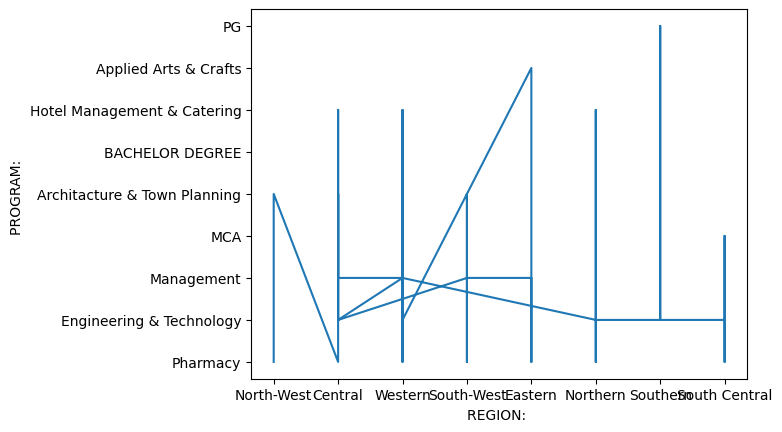

In [13]:
plt.plot(df["Region"],df["Program"])
plt.xlabel("REGION: ")
plt.ylabel("PROGRAM: ")
plt.show()